In [1]:
from __future__ import annotations

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hysteresis_scripts.dataset import BTrainDataset

In [2]:
# if on macos
if os.uname().sysname == "Darwin":
    os.environ["JAVA_HOME"] = os.popen("/usr/libexec/java_home -v 11").read().strip()

In [3]:
os.environ["JAVA_HOME"]

'/opt/homebrew/Cellar/openjdk@11/11.0.28/libexec/openjdk.jdk/Contents/Home'

In [8]:
dataset = BTrainDataset.from_nxcals(
    start="2025-08-22 13:10:00.000+02:00",
    end="2025-08-22 13:30:00.000+02:00"
)

In [9]:
for i, cycle in enumerate(dataset.aslist()):
    print(f"Cycle {i}: {cycle.user}")

Cycle 0: MD1
Cycle 1: SFTPRO1
Cycle 2: MD3
Cycle 3: MD4
Cycle 4: MD1
Cycle 5: SFTPRO1
Cycle 6: MD3
Cycle 7: MD4
Cycle 8: MD1
Cycle 9: SFTPRO1
Cycle 10: MD3
Cycle 11: MD4
Cycle 12: MD1
Cycle 13: SFTPRO1
Cycle 14: MD3
Cycle 15: MD4
Cycle 16: MD1
Cycle 17: SFTPRO1
Cycle 18: MD3
Cycle 19: MD4
Cycle 20: MD1
Cycle 21: SFTPRO1
Cycle 22: MD3
Cycle 23: MD4
Cycle 24: MD1
Cycle 25: SFTPRO1
Cycle 26: MD3
Cycle 27: MD4
Cycle 28: MD1
Cycle 29: SFTPRO1
Cycle 30: MD3
Cycle 31: MD4
Cycle 32: MD1
Cycle 33: SFTPRO1
Cycle 34: MD3
Cycle 35: MD4
Cycle 36: MD1
Cycle 37: SFTPRO1
Cycle 38: MD3
Cycle 39: MD4
Cycle 40: MD1
Cycle 41: SFTPRO1
Cycle 42: MD3
Cycle 43: MD4
Cycle 44: MD1
Cycle 45: SFTPRO1
Cycle 46: MD3
Cycle 47: MD4
Cycle 48: MD1
Cycle 49: SFTPRO1
Cycle 50: MD3
Cycle 51: MD4
Cycle 52: MD1
Cycle 53: SFTPRO1
Cycle 54: MD3
Cycle 55: MD4
Cycle 56: MD1
Cycle 57: SFTPRO1
Cycle 58: MD3
Cycle 59: MD4
Cycle 60: MD1
Cycle 61: SFTPRO1
Cycle 62: MD3
Cycle 63: MD4
Cycle 64: MD1
Cycle 65: SFTPRO1
Cycle 66: MD3
Cycl

In [32]:
cycles = dataset.aslist()

conversion_factor = 741.3 * 3e8 / 1e9  # T to GeV

energy_ticks = np.array([14, 26, 200, 300, 400, 450])
energy_ticks_in_field = energy_ticks / conversion_factor
energy_labels = [f"{energy:3.0f}" for energy in energy_ticks]

energy_ticks_in_field

array([0.06295247, 0.11691173, 0.89932101, 1.34898152, 1.79864203,
       2.02347228])

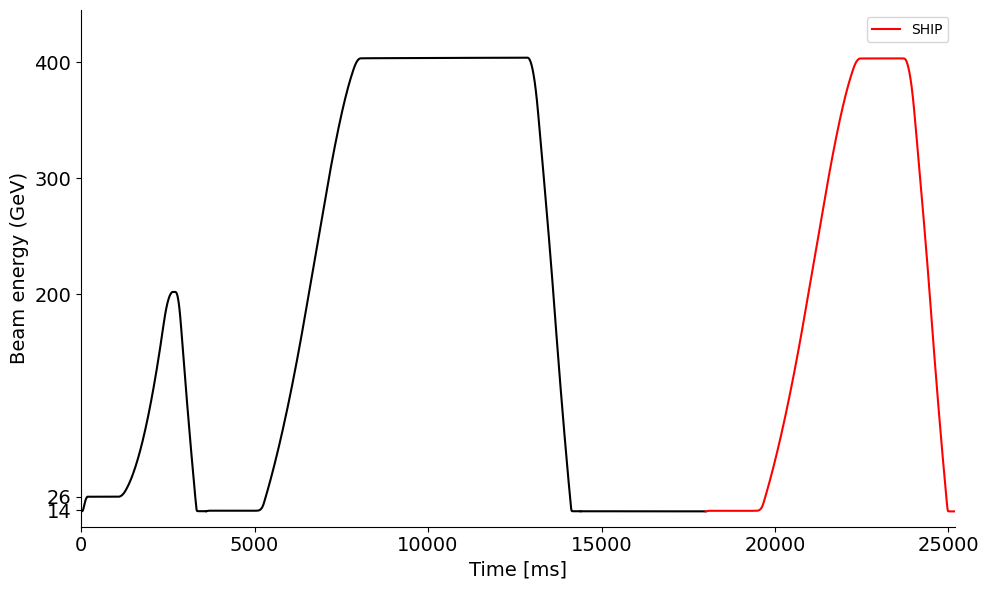

In [38]:
FONTSIZE = 14
fig, ax = plt.subplots(figsize=(10, 6))

t_start = cycles[0].time_as_ms[0]
for i, cycle in enumerate(cycles[:4]):
    ax.plot(cycle.time_as_ms - t_start, cycle.b_meas, c="k" if cycle.user != "MD4" else "r")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Time [ms]", fontsize=FONTSIZE)
ax.set_ylabel("Beam energy (GeV)", fontsize=FONTSIZE)
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE)

ax.yaxis.set_ticks(energy_ticks_in_field)
ax.yaxis.set_ticklabels([f"{field:d}" for field in energy_ticks], fontsize=FONTSIZE)

ax.set_ylim(0, 2.0)
ax.set_xlim(0, cycle.time_as_ms[-1] - t_start)

ax.legend(handles=[plt.Line2D([], [], c="r", label="SHIP")])

fig.tight_layout()
for ext in ("png", "pdf", "webp", "svg"):
    fig.savefig(f"magnetic_cycle_fMD1.{ext}", bbox_inches="tight", transparent=True, dpi=300)

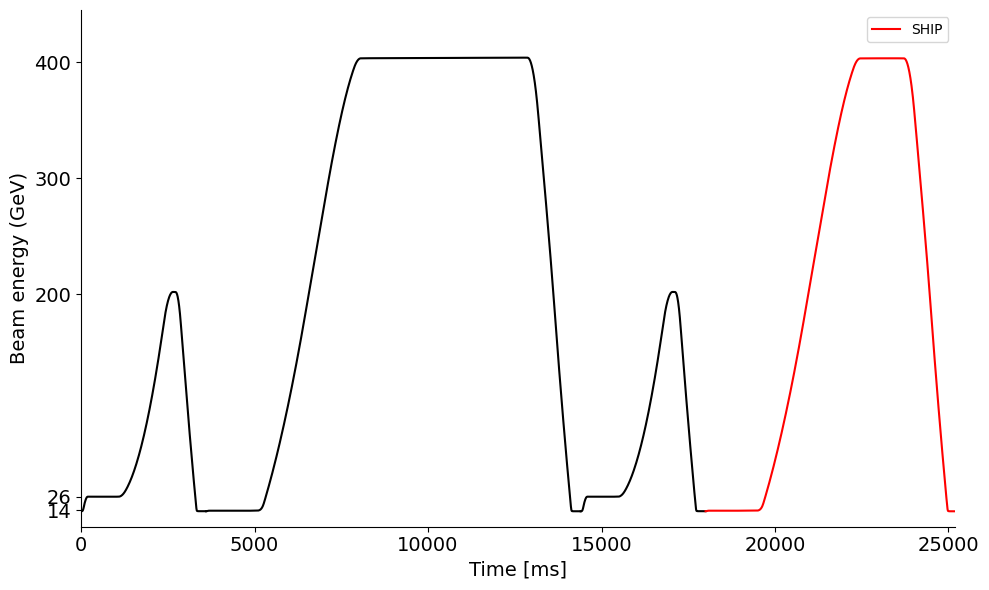

In [40]:
FONTSIZE = 14
fig, ax = plt.subplots(figsize=(10, 6))

s = slice(-10, -6)
t_start = cycles[s.start].time_as_ms[0]
for i, cycle in enumerate(cycles[s]):
    ax.plot(cycle.time_as_ms - t_start, cycle.b_meas, c="k" if cycle.user != "MD4" else "r")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Time [ms]", fontsize=FONTSIZE)
ax.set_ylabel("Beam energy (GeV)", fontsize=FONTSIZE)
ax.tick_params(axis="both", which="major", labelsize=FONTSIZE)

ax.yaxis.set_ticks(energy_ticks_in_field)
ax.yaxis.set_ticklabels([f"{field:d}" for field in energy_ticks], fontsize=FONTSIZE)

ax.set_ylim(0, 2.0)
ax.set_xlim(0, cycle.time_as_ms[-1] - t_start)

ax.legend(handles=[plt.Line2D([], [], c="r", label="SHIP")])

fig.tight_layout()
for ext in ("png", "pdf", "webp", "svg"):
    fig.savefig(f"magnetic_cycle_MD1.{ext}", bbox_inches="tight", transparent=True, dpi=300)